In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 10
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_sine'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

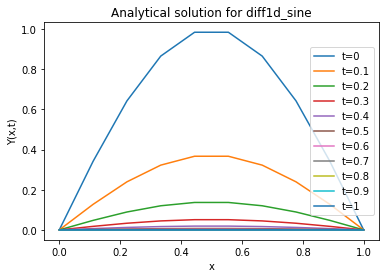

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## Nelder-Mead (default)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

2min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[-0.41982838, -2.05893936,  0.2429648 , ...,  2.99946818,
        -2.13826131,  6.55982537],
       [-0.40727055, -2.06972557,  0.24620076, ...,  2.97798881,
        -2.18071622,  6.56754431],
       [-0.44682226, -2.07671356,  0.21802888, ...,  3.02146556,
        -2.05973031,  6.3480947 ],
       ...,
       [-0.41145994, -2.09698833,  0.23324223, ...,  2.96228679,
        -2.16745688,  6.43690878],
       [-0.4359808 , -2.07302919,  0.21342175, ...,  2.97338053,
        -2.02725021,  6.29222641],
       [-0.43471423, -2.05166039,  0.22918087, ...,  2.95221247,
        -2.05515022,  6.27548888]]), array([49.72598229, 49.91161697, 50.19025302, 50.26380402, 50.35102775,
       50.38238143, 50.41974   , 50.43619167, 50.43894406, 50.50548237,
       50.52449228, 50.52943215, 50.59375518, 50.59724833, 50.59912168,
       50.6691862 , 50.67494635, 50.7042161 , 50.72532243, 50.74624806,
       50.75885

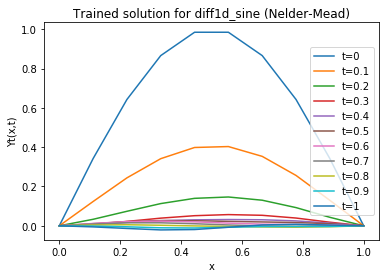

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

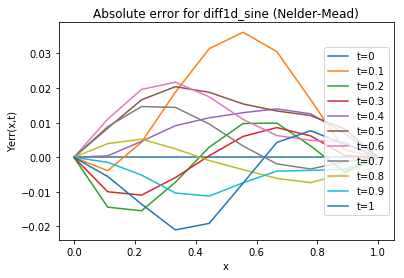

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

## Nelder-Mead (maxfev=16000)

In [9]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
options['maxfev'] = 16000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

4min 10s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[-0.98333311, -2.25190984,  0.29311542, ...,  4.60847348,
        -2.72619224,  7.27645946],
       [-0.98076399, -2.24554715,  0.29630666, ...,  4.58772049,
        -2.70900609,  7.25593412],
       [-0.98318825, -2.24707338,  0.29494098, ...,  4.60065194,
        -2.72105249,  7.2663369 ],
       ...,
       [-0.95493767, -2.24722328,  0.31029313, ...,  4.52758764,
        -2.75578139,  7.34726947],
       [-0.96034768, -2.24613389,  0.31066785, ...,  4.54081866,
        -2.75544241,  7.35169806],
       [-0.96941493, -2.24085515,  0.30877274, ...,  4.55792561,
        -2.73878716,  7.32752944]]), array([34.22582853, 34.23671106, 34.23932045, 34.23961454, 34.23991275,
       34.24032661, 34.24052116, 34.24293887, 34.24316437, 34.24361457,
       34.24449132, 34.24569531, 34.24672116, 34.24723351, 34.24750511,
       34.24777629, 34.2481537 , 34.2482673 , 34.24862564, 34.24888487,
       34.24917

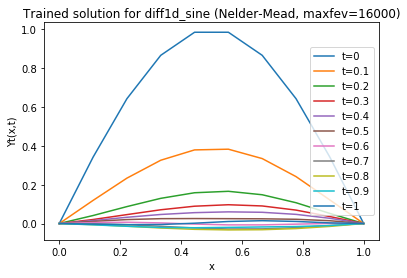

In [10]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

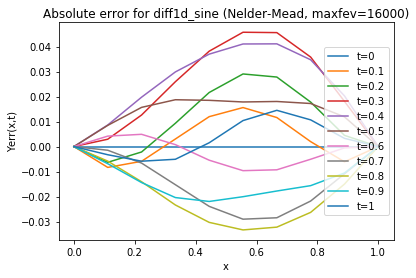

In [11]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (maxfev=32000)

In [12]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
options['maxfev'] = 32000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

8min 56s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[-0.7245166 , -2.73317242,  0.49868242, ...,  5.20804377,
        -3.87473272,  8.90078238],
       [-0.73223183, -2.74694992,  0.48926311, ...,  5.26356864,
        -3.88409945,  8.92419585],
       [-0.72756298, -2.7475638 ,  0.49069859, ...,  5.25231166,
        -3.88634192,  8.93189301],
       ...,
       [-0.73154457, -2.75084494,  0.48036678, ...,  5.26428819,
        -3.89747479,  8.9154141 ],
       [-0.73155781, -2.73318469,  0.48821148, ...,  5.23159723,
        -3.85092215,  8.87651091],
       [-0.73086658, -2.75031123,  0.49128328, ...,  5.25798682,
        -3.91457755,  8.94477665]]), array([22.37639502, 22.38104577, 22.38754706, 22.38811086, 22.38932026,
       22.38972611, 22.3918601 , 22.3922818 , 22.39485306, 22.40025651,
       22.40156942, 22.40168746, 22.40194059, 22.40206934, 22.40263488,
       22.40293174, 22.40313124, 22.4035504 , 22.40405721, 22.40407851,
       22.40457

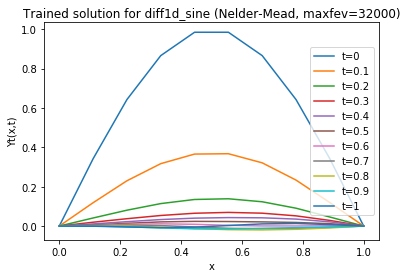

In [13]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

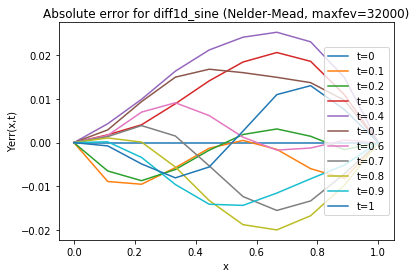

In [14]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (maxfev=64000)

In [15]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
options['maxfev'] = 64000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

Optimization terminated successfully.
         Current function value: 20.681257
         Iterations: 44114
         Function evaluations: 50962
13min 29s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[-0.47324344, -2.64549314,  0.74030733, ...,  4.73220018,
        -4.41768024,  8.56608103],
       [-0.47324275, -2.64549118,  0.74030713, ...,  4.73219632,
        -4.41767727,  8.56607854],
       [-0.47324107, -2.64549396,  0.74030802, ...,  4.732193  ,
        -4.41768373,  8.56607899],
       ...,
       [-0.47324403, -2.64549436,  0.74030757, ...,  4.73219974,
        -4.41767931,  8.56608175],
       [-0.47324195, -2.64549286,  0.74030879, ...,  4.73219216,
        -4.41768043,  8.56608072],
       [-0.47324491, -2.6454939 ,  0.74030552, ...,  4.73220155,
        -4.41767744,  8.56608039]]), array([20.68125695, 20.68125695, 20.68125695, 20.68125695, 20.68125695,
       20.68125695, 20.68125695, 20.68125695, 20.68125695, 20.68125695,
       20.681

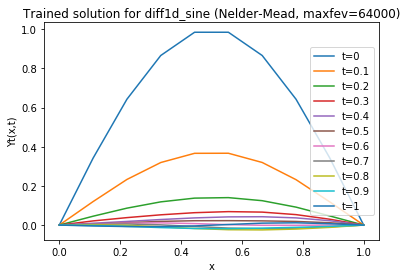

In [16]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

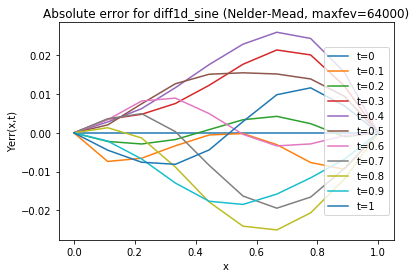

In [17]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (maxfev=64000, xatol=fatol=1e-6)

In [18]:
net5 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
options['fatol'] = 1e-6
options['maxfev'] = 64000
options['xatol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net5.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net5.res)

16min 40s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[-0.47406937, -2.62801285,  0.9758962 , ...,  4.5035774 ,
        -3.98755877,  8.44608708],
       [-0.47487991, -2.62864866,  0.97776617, ...,  4.50321891,
        -3.98605072,  8.44251334],
       [-0.47413277, -2.62847865,  0.97628414, ...,  4.50685286,
        -3.99029665,  8.44532199],
       ...,
       [-0.47246586, -2.63071417,  0.97540169, ...,  4.50247791,
        -3.99634025,  8.44790746],
       [-0.47432352, -2.62796932,  0.97704519, ...,  4.5011412 ,
        -3.98369293,  8.44175708],
       [-0.47432781, -2.62798825,  0.97380383, ...,  4.50395661,
        -3.9919968 ,  8.4428771 ]]), array([20.48075019, 20.48075294, 20.48084081, 20.48086039, 20.48086093,
       20.48086284, 20.48088211, 20.48088784, 20.48088991, 20.48089422,
       20.48089696, 20.48090348, 20.48090656, 20.48091189, 20.48092432,
       20.48093231, 20.48094008, 20.48094388, 20.48095484, 20.48095919,
       20.4809

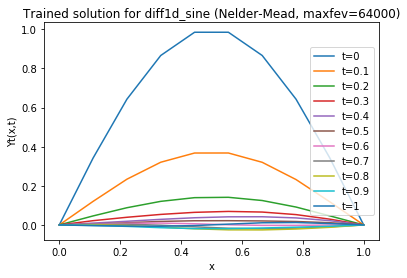

In [19]:
Yt5 = net5.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

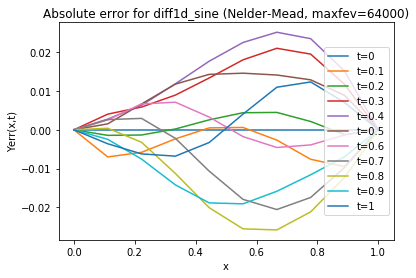

In [20]:
Y_err5 = Yt5 - Ya
for i in range(nt):
    plt.plot(xt, Y_err5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (maxfev=128000, xatol=fatol=1e-6)

In [21]:
net6 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
options['fatol'] = 1e-6
options['maxfev'] = 128000
options['xatol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net6.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net6.res)

Optimization terminated successfully.
         Current function value: 20.480463
         Iterations: 57923
         Function evaluations: 67054
17min 20s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[-0.47358918, -2.62757068,  0.97848316, ...,  4.50147669,
        -3.98456791,  8.443144  ],
       [-0.47358917, -2.62757069,  0.97848316, ...,  4.50147666,
        -3.98456795,  8.44314399],
       [-0.47358917, -2.62757073,  0.97848321, ...,  4.50147662,
        -3.98456789,  8.44314401],
       ...,
       [-0.47358918, -2.62757069,  0.97848318, ...,  4.50147664,
        -3.98456788,  8.44314398],
       [-0.47358917, -2.62757069,  0.97848321, ...,  4.50147653,
        -3.98456779,  8.44314392],
       [-0.47358915, -2.62757067,  0.97848322, ...,  4.50147665,
        -3.98456796,  8.44314405]]), array([20.48046293, 20.48046293, 20.48046293, 20.48046293, 20.48046293,
       20.48046293, 20.48046293, 20.48046293, 20.48046293, 20.48046293,
       20.480

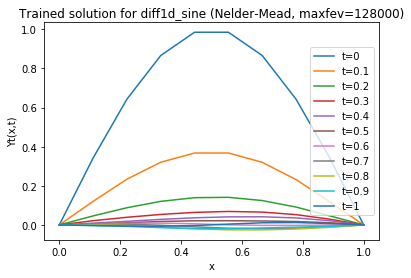

In [22]:
Yt6 = net6.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt6[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

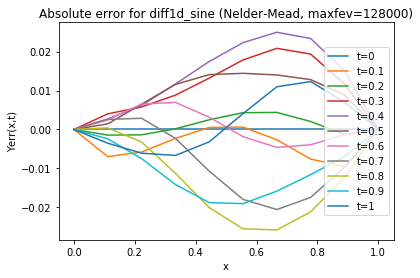

In [23]:
Y_err6 = Yt6 - Ya
for i in range(nt):
    plt.plot(xt, Y_err6[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

## Nelder-Mead (maxfev=128000, xatol=fatol=1e-8)

In [24]:
net7 = NNPDE2DIFF1D(eq)
trainalg = 'Nelder-Mead'
options = {}
options['disp'] = True
options['fatol'] = 1e-8
options['maxfev'] = 128000
options['xatol'] = 1e-8
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net7.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net7.res)

Optimization terminated successfully.
         Current function value: 20.480463
         Iterations: 58132
         Function evaluations: 67589
17min 32s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
 final_simplex: (array([[-0.4735892 , -2.6275707 ,  0.97848317, ...,  4.5014767 ,
        -3.98456789,  8.44314395],
       [-0.4735892 , -2.6275707 ,  0.97848317, ...,  4.5014767 ,
        -3.98456789,  8.44314395],
       [-0.4735892 , -2.6275707 ,  0.97848317, ...,  4.5014767 ,
        -3.98456789,  8.44314395],
       ...,
       [-0.4735892 , -2.6275707 ,  0.97848317, ...,  4.5014767 ,
        -3.9845679 ,  8.44314395],
       [-0.4735892 , -2.6275707 ,  0.97848317, ...,  4.5014767 ,
        -3.98456789,  8.44314395],
       [-0.4735892 , -2.6275707 ,  0.97848317, ...,  4.5014767 ,
        -3.98456789,  8.44314395]]), array([20.48046293, 20.48046293, 20.48046293, 20.48046293, 20.48046293,
       20.48046293, 20.48046293, 20.48046293, 20.48046293, 20.48046293,
       20.480

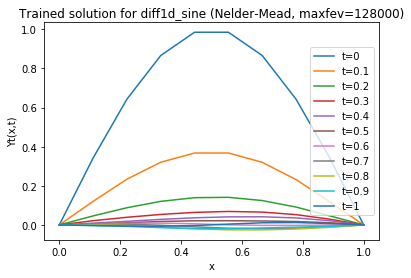

In [25]:
Yt7 = net7.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt7[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));

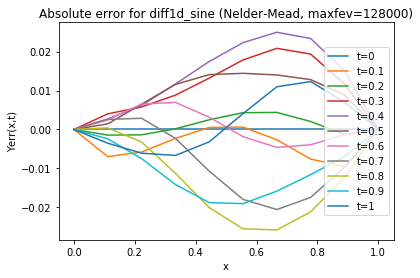

In [26]:
Y_err7 = Yt7 - Ya
for i in range(nt):
    plt.plot(xt, Y_err7[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, maxfev=%d)' % (eq_name, trainalg, options['maxfev']));